<h3> Data source https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading data

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data is highly imbalanced


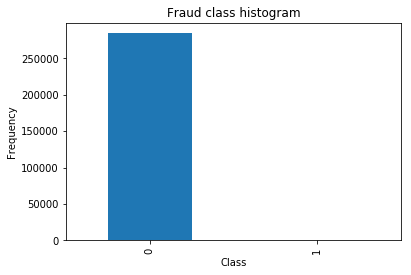

In [3]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

print("Data is highly imbalanced")

In [4]:
from sklearn.preprocessing import StandardScaler

# Amount is a large value so need to scale it according to other features

data['scaled_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [6]:
# Dropping not important features

data = data.drop(['Time', 'Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
# Separating the class feature

X= data.loc[:, data.columns != 'Class']
y= data.loc[:, data.columns == 'Class'] 

In [8]:
X.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y.head(2)

,Class
0,0
1,0


# Logistic Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Importing logistic regression model

from sklearn.linear_model import LogisticRegression

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predictions = logmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.88      0.62      0.73       147

avg / total       1.00      1.00      1.00     85443



In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, predictions)

array([[85284,    12],
       [   56,    91]], dtype=int64)

# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
print(confusion_matrix(y_test, predictions))

[[85263    33]
 [   35   112]]


In [24]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.77      0.76      0.77       147

avg / total       1.00      1.00      1.00     85443



# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=200)

In [27]:
# Taking too much time
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test, rfc_pred))

[[85289     7]
 [   33   114]]


In [30]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.94      0.78      0.85       147

avg / total       1.00      1.00      1.00     85443



# Support Vector Machine

In [31]:
from sklearn.svm import SVC

In [32]:
model = SVC()

In [33]:
# Taking too much time 
model.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
predictions = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, predictions))

[[85291     5]
 [   55    92]]


In [36]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.95      0.63      0.75       147

avg / total       1.00      1.00      1.00     85443



# This data set is highly imbalanced so recall will be the best measure instead of accuracy. However, Sampling technique is also a best approach to get better results. 

# I just copy pasted following code from one of the kernels of Kaggle for sampling

In [37]:
from sklearn.metrics import roc_auc_score, recall_score

In [38]:
fraud_count = len(data[data.Class == 1])
fraud_indices = data[data.Class == 1].index
normal_indices = data[data.Class == 0].index

r_normal_indices = np.random.choice(normal_indices, fraud_count, replace = False) # random 

undersample_indices = np.concatenate([fraud_indices,r_normal_indices])
undersample_train = data.iloc[undersample_indices,:]

X_undersample = undersample_train.loc[:, undersample_train.columns != 'Class']
y_undersample = undersample_train.loc[:, undersample_train.columns == 'Class']


In [39]:
X_tr_u, X_test_u, y_tr_u, y_test_u = train_test_split(X_undersample,y_undersample,test_size = 0.3,random_state = 0)

In [40]:
logreg = LogisticRegression(C = .01, penalty = 'l1')
logreg.fit(X_tr_u,y_tr_u.values.ravel())
y_pred_u= logreg.predict(X_test_u)
y_pred_u_proba=logreg.predict_proba(X_test_u)
print('cm:', confusion_matrix(y_test_u,y_pred_u))
print('cr:', classification_report(y_test_u,y_pred_u))
print('recall_score:', recall_score(y_test_u,y_pred_u))
print('roc_auc_score:',roc_auc_score(y_test_u,y_pred_u))

cm: [[137  12]
 [ 10 137]]
cr:              precision    recall  f1-score   support

          0       0.93      0.92      0.93       149
          1       0.92      0.93      0.93       147

avg / total       0.93      0.93      0.93       296

recall_score: 0.9319727891156463
roc_auc_score: 0.9257179381819841


<h3> Results will change according to value of C while passing as a parameter
<h3> In similar way we can apply other models also for sampling data

# Decision Tree

In [41]:
dtree2 = DecisionTreeClassifier()

In [42]:
dtree2.fit(X_tr_u, y_tr_u)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
predictions = dtree2.predict(X_test_u)

In [44]:
print(classification_report(y_test_u, predictions))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93       149
          1       0.93      0.93      0.93       147

avg / total       0.93      0.93      0.93       296



In [45]:
print(confusion_matrix(y_test_u, predictions))

[[139  10]
 [ 11 136]]


<h2> Similarly for other models